# Importing The Libs

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

import warnings

# Ignore warnings
warnings.filterwarnings("ignore")


# Read The Dataset

In [186]:
traffic_df = pd.read_csv('Traffic.csv')
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


### Describe the dataset

In [187]:
traffic_df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


### Names of columns

In [188]:
traffic_df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

### Types of columns

In [189]:
traffic_df.dtypes

Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object

### Create an empty 'midday' column
Adding the values of 'AM' & 'PM' to midday column

In [190]:
traffic_df['midday'] = ''  

for i in range(len(traffic_df['Time'])):
    
    if traffic_df['Time'][i][-2:] == 'AM':
        traffic_df.loc[i, 'midday'] = 'AM'
        
    elif traffic_df['Time'][i][-2:] == 'PM':
        traffic_df.loc[i, 'midday'] = 'PM'
        
# removing 'AM' or 'PM' form Time column        
traffic_df['Time'] = traffic_df['Time'].str[:-2]

In [191]:
traffic_df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,midday
0,12:00:00,10,Tuesday,31,0,4,4,39,low,AM
1,12:15:00,10,Tuesday,49,0,3,3,55,low,AM
2,12:30:00,10,Tuesday,46,0,3,6,55,low,AM
3,12:45:00,10,Tuesday,51,0,2,5,58,low,AM
4,1:00:00,10,Tuesday,57,6,15,16,94,normal,AM
...,...,...,...,...,...,...,...,...,...,...
2971,10:45:00,9,Thursday,16,3,1,36,56,normal,PM
2972,11:00:00,9,Thursday,11,0,1,30,42,normal,PM
2973,11:15:00,9,Thursday,15,4,1,25,45,normal,PM
2974,11:30:00,9,Thursday,16,5,0,27,48,normal,PM


# Visualize The Columns 

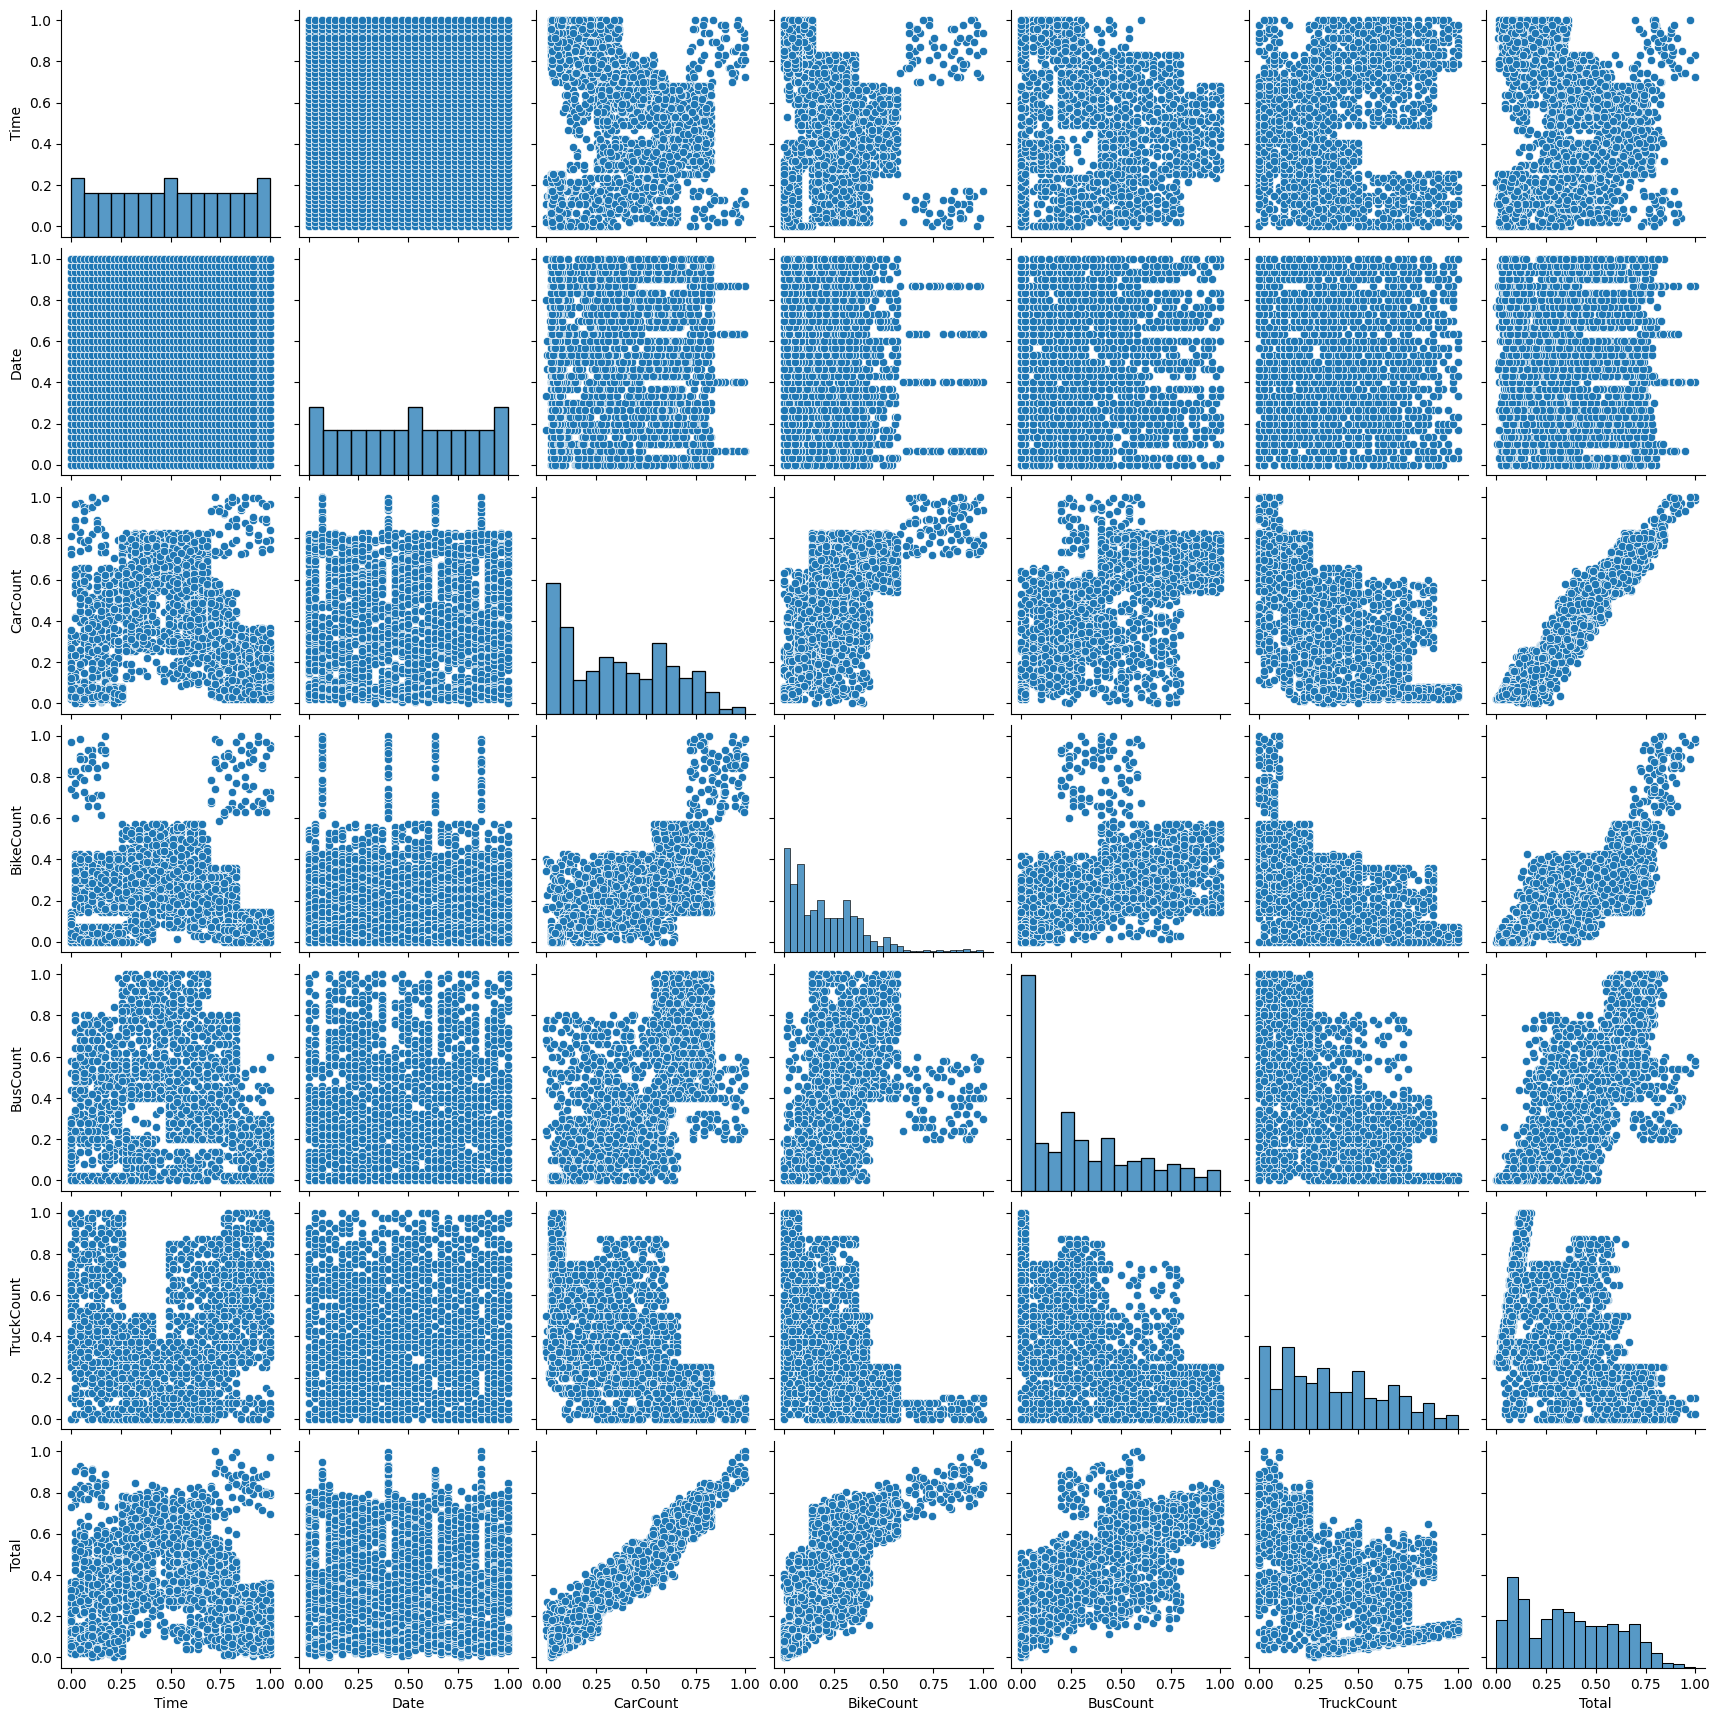

In [208]:

# Plot the numeric features
numeric_columns = ['Time', 'Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
sns.pairplot(traffic_df[numeric_columns])
plt.show()


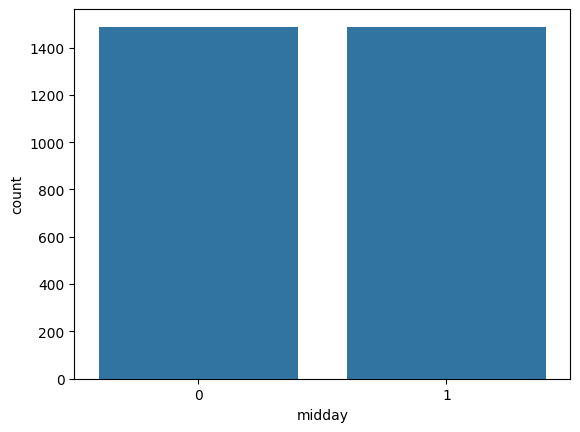

In [209]:

# Plot the categorical feature 'midday'
sns.countplot(x='midday', data=traffic_df)
plt.show()


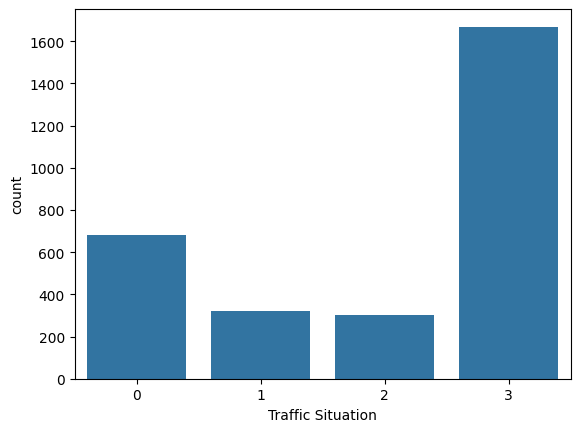

In [210]:

# Plot the target variable 'Traffic Situation'
sns.countplot(x='Traffic Situation', data=traffic_df)
plt.show()

### Changing the Time Column from (Hour:Min:Sec) format to Second

In [193]:
# Assuming 'Time' is the name of the column in your DataFrame
traffic_df['Time'] = pd.to_datetime(traffic_df['Time']).dt.hour * 3600 + \
                     pd.to_datetime(traffic_df['Time']).dt.minute * 60 + \
                     pd.to_datetime(traffic_df['Time']).dt.second

In [194]:
# Check the column names of traffic_df
traffic_df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,midday
0,43200,10,Tuesday,31,0,4,4,39,low,AM
1,44100,10,Tuesday,49,0,3,3,55,low,AM
2,45000,10,Tuesday,46,0,3,6,55,low,AM
3,45900,10,Tuesday,51,0,2,5,58,low,AM
4,3600,10,Tuesday,57,6,15,16,94,normal,AM
...,...,...,...,...,...,...,...,...,...,...
2971,38700,9,Thursday,16,3,1,36,56,normal,PM
2972,39600,9,Thursday,11,0,1,30,42,normal,PM
2973,40500,9,Thursday,15,4,1,25,45,normal,PM
2974,41400,9,Thursday,16,5,0,27,48,normal,PM


### Normalize and Encode the columns

Time, Date, Day of the week, CarCount, BikeCount, BusCount, TruckCount, Total columns are numeric columns and midday, 

In [197]:

# Separate the features and target variable
features = traffic_df.drop(['Traffic Situation'], axis=1)
target = traffic_df['Traffic Situation']

# Normalize the numeric features using MinMaxScaler
numeric_columns = ['Time', 'Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
scaler = MinMaxScaler()
features[numeric_columns] = scaler.fit_transform(features[numeric_columns])

# Encode the categorical feature 'midday' using LabelEncoder
le_ = LabelEncoder()
features['midday'] = le.fit_transform(features['midday'])
features['Day of the week'] = le.fit_transform(features['Day of the week'])

# Encode the target variable 'Traffic Situation' using LabelEncoder
le_target = LabelEncoder()
target = le_target.fit_transform(target)

# Concatenate the features and target variable
normalized_encoded_data = pd.concat([features, pd.Series(target, name='Traffic Situation')], axis=1)


In [199]:
traffic_df = normalized_encoded_data
traffic_df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday,Traffic Situation
0,0.936170,0.300000,5,0.143678,0.000000,0.08,0.100,0.069767,0,2
1,0.957447,0.300000,5,0.247126,0.000000,0.06,0.075,0.131783,0,2
2,0.978723,0.300000,5,0.229885,0.000000,0.06,0.150,0.131783,0,2
3,1.000000,0.300000,5,0.258621,0.000000,0.04,0.125,0.143411,0,2
4,0.000000,0.300000,5,0.293103,0.085714,0.30,0.400,0.282946,0,3
...,...,...,...,...,...,...,...,...,...,...
2971,0.829787,0.266667,4,0.057471,0.042857,0.02,0.900,0.135659,1,3
2972,0.851064,0.266667,4,0.028736,0.000000,0.02,0.750,0.081395,1,3
2973,0.872340,0.266667,4,0.051724,0.057143,0.02,0.625,0.093023,1,3
2974,0.893617,0.266667,4,0.057471,0.071429,0.00,0.675,0.104651,1,3


## Spliting The Dataset to Train and Test

In [200]:

X = traffic_df.drop('Traffic Situation', axis=1)

y = traffic_df['Traffic Situation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2380, 9), (596, 9), (2380,), (596,))

In [201]:
X_train

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday
1557,0.361702,0.833333,4,0.333333,0.385714,0.10,0.125,0.310078,0
509,0.531915,0.466667,3,0.827586,0.185714,0.62,0.100,0.686047,0
2044,0.510638,1.000000,5,0.735632,0.142857,0.88,0.000,0.647287,0
1847,0.404255,0.933333,3,0.586207,0.342857,0.04,0.475,0.511628,0
2097,0.617021,1.000000,5,0.425287,0.200000,0.40,0.375,0.418605,1
...,...,...,...,...,...,...,...,...,...
1638,0.042553,0.866667,0,0.080460,0.028571,0.00,0.425,0.069767,0
1095,0.744681,0.666667,3,0.528736,0.300000,0.20,0.125,0.437984,0
1130,0.468085,0.666667,3,0.632184,0.314286,0.46,0.175,0.569767,1
1294,0.893617,0.733333,1,0.195402,0.128571,0.30,0.700,0.275194,0


In [202]:
y_train

1557    2
509     0
2044    0
1847    3
2097    3
       ..
1638    3
1095    3
1130    0
1294    3
860     3
Name: Traffic Situation, Length: 2380, dtype: int64

## Training The Model

In [203]:

model = LogisticRegression(multi_class='ovr')

model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

## Prediction

In [213]:
y_pred = model.predict(X_test)
y_pred

array([3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 2, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0,
       0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3,
       0, 3, 3, 3, 0, 0, 3, 0, 2, 3, 3, 3, 0, 3, 3, 3, 2, 3, 0, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 3,
       3, 0, 3, 3, 3, 1, 0, 3, 3, 3, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3,

## Evaluation

In [223]:
y_test, y_pred

(2404    2
 2866    1
 2775    3
 507     1
 1825    3
        ..
 2040    0
 2617    0
 678     3
 605     0
 1343    3
 Name: Traffic Situation, Length: 596, dtype: int64,
 array([3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
        0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3,
        0, 3, 3, 2, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 2, 3, 3,
        3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0,
        0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3,
        0, 3, 3, 3, 0, 0, 3, 0, 2, 3, 3, 3, 0, 3, 3, 3, 2, 3, 0, 3, 3, 3,
        3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 3,
        3, 0, 3, 3, 3, 1, 0, 3, 3, 3, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3,
        0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3,
        3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0,
        3, 0

In [225]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision with 'weighted' average setting
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall with 'weighted' average setting
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score with 'weighted' average setting
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [227]:
print(f'Accuracy: {accuracy}')
print(f'precision: {precision}') 
print(f'recall: {recall}') 
print(f'f1_score: {f1}') 

Accuracy: 0.7734899328859061
precision: 0.7412438232908032
recall: 0.7734899328859061
f1_score: 0.7148296070681293


In [228]:
cm

array([[124,   2,   0,   1],
       [ 17,   2,   0,  44],
       [  0,   0,  15,  51],
       [ 14,   0,   6, 320]])